# NAC5 - Python Visão Computacional

* Gabriel Henrique Pereira Soares 	- RM86420
* Antonio Sassine Mendinça			- RM84297

## Rúbrica 1
Use a imagem circulo.png para implementar um código que:​

* Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. (máx 3 pontos) ​

* Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; (máx 3 pontos) ​

* Essa rubrica pode ser feita no jupyter notebook ou google Colab.​

### Carregamento da imagem

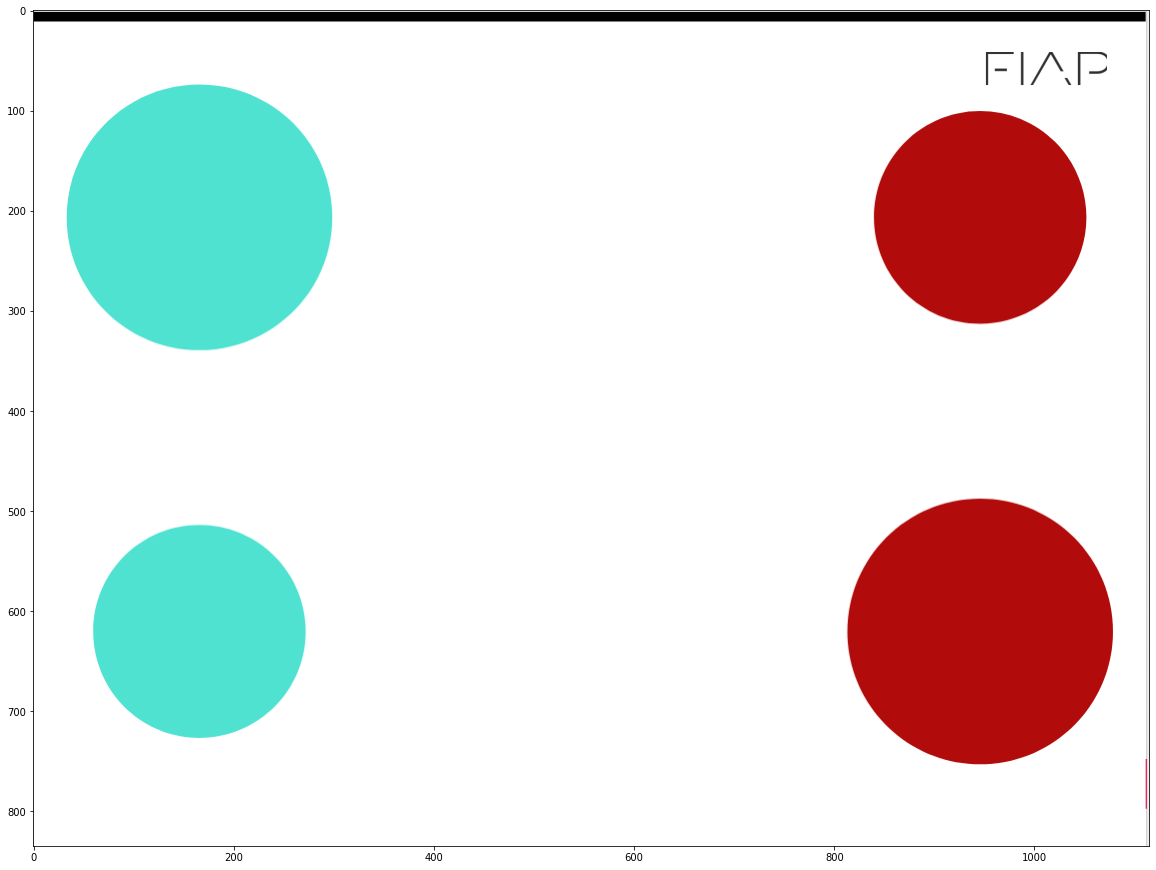

In [1]:
%matplotlib inline
# Import das bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_circulo = cv2.imread('circulo.png')
img_rgb = cv2.cvtColor(img_circulo, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_circulo, cv2.COLOR_BGR2HSV)
img_size = img_rgb.shape

img_circulo.shape

plt.figure(figsize = (20,20))

plt.imshow(img_rgb)
plt.show()


### Segmentação dos círculos

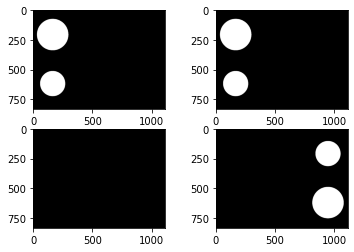

In [2]:
# Biblioteca customizada
from helper_functions import calc_hsv_range

# Valores HSV aproximados para os círculos azuis e vermelhos
blue_hsv = (172, 65, 88)
red_hsv = (0, 93, 69)

# Threshold para segmentação da imagem
threshold = (10, 5, 5)

# Ranges mínimos e máximos da imagem
range_blue = calc_hsv_range(blue_hsv, threshold)
range_red = calc_hsv_range(red_hsv, threshold)

# Segmenta os dois ranges dos círculos azuis
mask_blue_1 = cv2.inRange(img_hsv, range_blue[0], range_blue[1])
mask_blue_2 = cv2.inRange(img_hsv, range_blue[2], range_blue[3])

# Segmenta os dois ranges dos círculos vermelhos
mask_red_1 = cv2.inRange(img_hsv, range_red[0], range_red[1])
mask_red_2 = cv2.inRange(img_hsv, range_red[2], range_red[3])

# Mostra o resultado
plt.subplot(2, 2, 1)
plt.imshow(mask_blue_1, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(2, 2, 2)
plt.imshow(mask_blue_2, cmap="Greys_r", vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.imshow(mask_red_1, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(2, 2, 4)
plt.imshow(mask_red_2, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

### Junta as segmentações

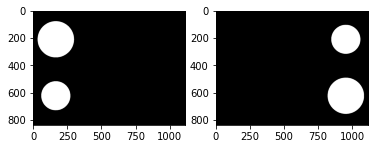

In [3]:
# Junta as imagens segmentadas
mask_blue = cv2.bitwise_or(mask_blue_1, mask_blue_2)
mask_red = cv2.bitwise_or(mask_red_1, mask_red_2)

# Mostra o resultado
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="Greys_r", vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(mask_red, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

### Detecção de cotornos

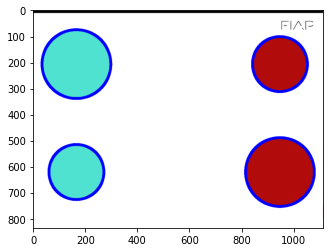

In [4]:
# Acha os contornos nas segmentações
cont_blue, _ = cv2.findContours(mask_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_red, _ = cv2.findContours(mask_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Converte para imagens RGB
blue_rgb = cv2.cvtColor(mask_blue, cv2.COLOR_GRAY2RGB)
red_rgb = cv2.cvtColor(mask_red, cv2.COLOR_GRAY2RGB)

# Cria uma cópia da imagem original
cont_img = img_rgb.copy()

# Desenha os contornos dos dois círculos
cv2.drawContours(cont_img, cont_blue, -1, [0, 0, 255], 10)
cv2.drawContours(cont_img, cont_red, -1, [0, 0, 255], 10)

# Mostra o resultado
plt.imshow(cont_img)
plt.show()

### Identificação dos maiores círculos

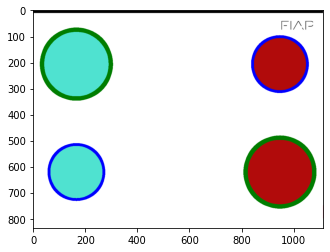

In [5]:
from helper_functions import find_greater

found_greater_blue, greater_blue, greater_blue_area = find_greater(cont_blue)
found_greater_red, greater_red, greater_red_area = find_greater(cont_red)

if not found_greater_blue or not found_greater_red: exit()

# Desenha os contornos dos dois círculos maiores
cv2.drawContours(cont_img, [greater_blue], -1, [0, 125, 0], 15)
cv2.drawContours(cont_img, [greater_red], -1, [0, 125, 0], 15)

# Mostra o resultado
plt.imshow(cont_img)
plt.show()

### Identificação do centro de massa dos dois círculos

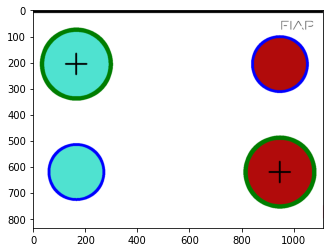

In [6]:
from helper_functions import draw_cross

moments_blue = cv2.moments(greater_blue)
moments_red = cv2.moments(greater_red)

# Centro de massa do círculo azul
blue_center_x = int(moments_blue['m10']/moments_blue['m00'])
blue_center_y = int(moments_blue['m01']/moments_blue['m00'])
draw_cross(cont_img, (blue_center_x, blue_center_y), (40, 40), (0, 0, 0))

# Centro de massa do círculo vermelho
red_center_x = int(moments_red['m10']/moments_red['m00'])
red_center_y = int(moments_red['m01']/moments_red['m00'])
draw_cross(cont_img, (red_center_x, red_center_y), (40, 40), (0, 0, 0))

# Mostra o resultado
plt.imshow(cont_img)
plt.show()


### Identificação da área dos dois círculos

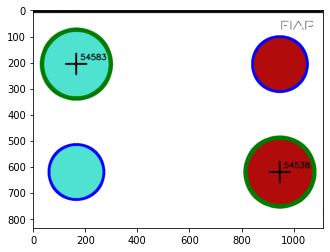

In [7]:
from helper_functions import draw_text

# Desenha a área do círculo azul
draw_text(
	cont_img, (blue_center_x + 16, blue_center_y - 16),
	cv2.FONT_HERSHEY_SIMPLEX, int(greater_blue_area), (0, 0, 0)
)

# Desenha a área do círculo vermelho
draw_text(
	cont_img, (red_center_x + 16, red_center_y - 16),
	cv2.FONT_HERSHEY_SIMPLEX, int(greater_red_area), (0, 0, 0)
)

# Mostra o resultado
plt.imshow(cont_img)
plt.show()